In [ ]:
import Pkg
Pkg.add("PlotlyJS")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Interpolations")  # Optional, only if you need to interpolate missing values
Pkg.add("CategoricalArrays")
Pkg.add("Turing")     # For Bayesian inference (optional if you want to run inference)
Pkg.add("GraphPlot")   # For graph visualization
Pkg.add("LightGraphs") # For working with graphs
Pkg.add("Distributions") # For handling distributions in Bayesian models

   Resolving package versions...
  No Changes to `C:\Users\aurascoper\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\aurascoper\.julia\environments\v1.9\Manifest.toml`


In [3]:
using CSV, DataFrames, CategoricalArrays
using PlotlyJS  # For creating interactive 3D plots
using Interpolations  # If you are using interpolation for missing data

# Load the Palmer Penguins dataset (adjust the path to your CSV file)
penguins = CSV.read("C:/users/aurascoper/Documents/SysDev/Kaggles/palmer_penguins/penguins.csv", DataFrame)

# Convert species to categorical data type
penguins.species = categorical(penguins.species)

344-element CategoricalArray{String15,1,UInt32}:
 String15("Adelie")
 String15("Adelie")
 String15("Adelie")
 String15("Adelie")
 String15("Adelie")
 String15("Adelie")
 String15("Adelie")
 String15("Adelie")
 String15("Adelie")
 String15("Adelie")
 String15("Adelie")
 String15("Adelie")
 String15("Adelie")
 ⋮
 String15("Chinstrap")
 String15("Chinstrap")
 String15("Chinstrap")
 String15("Chinstrap")
 String15("Chinstrap")
 String15("Chinstrap")
 String15("Chinstrap")
 String15("Chinstrap")
 String15("Chinstrap")
 String15("Chinstrap")
 String15("Chinstrap")
 String15("Chinstrap")

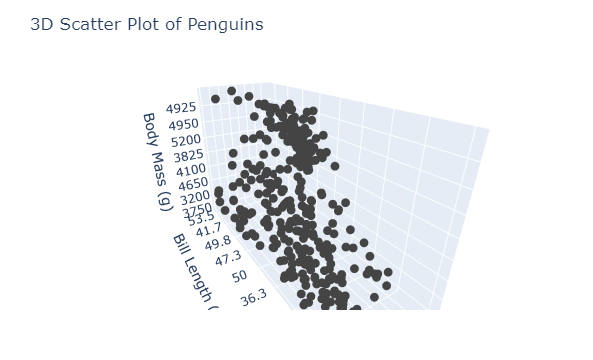

In [5]:
# Optionally handle missing data with Interpolation (use only if necessary)
function interpolate_column(col)
    idx = findall(!ismissing, col)  # Find indices of non-missing values
    itp = LinearInterpolation(idx, col[idx], extrapolation_bc = Line())  # Linear interpolation
    col = itp.(1:length(col))  # Apply interpolation to the whole column
end

# Optionally interpolate missing values in relevant columns
# Uncomment the next lines if you need to interpolate missing data
# penguins.flipper_length_mm = interpolate_column(penguins.flipper_length_mm)
# penguins.bill_length_mm = interpolate_column(penguins.bill_length_mm)
# penguins.body_mass_g = interpolate_column(penguins.body_mass_g)

# Create the 3D scatter plot
scatter3d_penguins = scatter3d(
    x = penguins.flipper_length_mm,  # X-axis: Flipper Length
    y = penguins.bill_length_mm,     # Y-axis: Bill Length
    z = penguins.body_mass_g,        # Z-axis: Body Mass
    mode = "markers",
    marker = attr(
        size = 5,
        color = penguins.species,    # Color by species
        colorscale = "Viridis"       # Color scale
    ),
    text = string.("Species: ", penguins.species, "<br>",
                   "Flipper Length (mm): ", penguins.flipper_length_mm, "<br>",
                   "Bill Length (mm): ", penguins.bill_length_mm, "<br>",
                   "Body Mass (g): ", penguins.body_mass_g)  # Hover text
)

# Define layout for the 3D plot
layout_penguins = Layout(
    title = "3D Scatter Plot of Penguins",
    scene = attr(
        xaxis = attr(title = "Flipper Length (mm)"),
        yaxis = attr(title = "Bill Length (mm)"),
        zaxis = attr(title = "Body Mass (g)")
    ),
    legend = attr(title = attr(text = "Species"))
)

# Plot the figure
plot(scatter3d_penguins, layout_penguins)

In [53]:
import Pkg

# Add all required packages in a single command
Pkg.add([
    "CSV", 
    "DataFrames", 
    "PalmerPenguins", 
    "StatsBase", 
    "Clustering", 
    "Plots", 
    "CategoricalArrays", 
    "Statistics"
])

   Resolving package versions...
  No Changes to `C:\Users\aurascoper\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\aurascoper\.julia\environments\v1.9\Manifest.toml`
